In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np



In [5]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [ ]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
	mean_array = []
	for i in range(1,n_bootstraps + 1):
		mean_array.append(np.mean(np.random.choice(x,sample_size)))
	sorted_array = np.sort(mean_array)
	lower = np.percentile(sorted_array, 2.5)
	upper = np.percentile(sorted_array, 97.5)
	data_mean = np.mean(mean_array)
 
	return data_mean, lower, upper


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

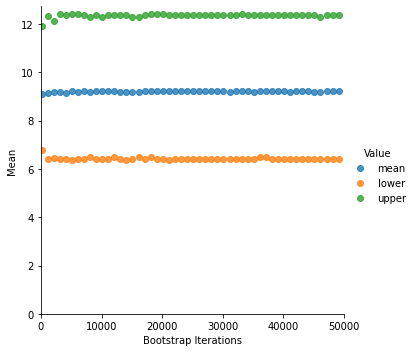

In [ ]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [4]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
	mean_array = []
	for i in range(1,n_bootstraps + 1):
		mean_array.append(np.mean(np.random.choice(sample,sample_size)))
	sorted_array = np.sort(mean_array)
	ci_breaker = (100-ci)/2
	lower = np.percentile(sorted_array, ci_breaker)
	upper = np.percentile(sorted_array, ci + ci_breaker)
	data_mean = np.mean(mean_array)
	return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

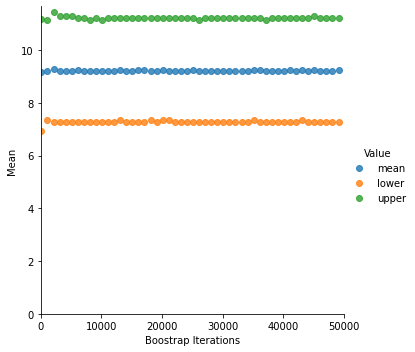

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


[24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31.
 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 22. 22. 33.
 39. 36. 28. 27. 21. 24. 30. 34. 32. 38. 37. 30. 31. 37. 32. 47. 41. 45.
 34. 33. 24. 32. 39. 35. 32. 37. 38. 34. 34. 32. 33. 32. 25. 24. 37. 31.
 36. 36. 34. 38. 32. 38. 32.]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


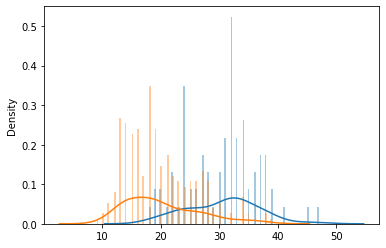

In [9]:
# data = df[df.columns[1]].values
# sns.lmplot(df.columns[0], df.columns[1], data=df, fit_reg=False)
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
vehicles = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
current_v_data = vehicles[vehicles.columns[0]].values
new = vehicles.dropna(subset=['New Fleet'])
new_v_data = new.values.T[1]
print(new_v_data)


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# sns.distplot(vehicles['Current fleet'])
# sns.distplot(vehicles['Current fleet'],kde=False,bins=5)

sns.distplot(new_v_data,hist= True,bins=100)
sns.distplot(current_v_data,hist=True,bins=100)

# sns.distplot(vehicles['New Fleet'])
# sns.distplot(vehicles['New Fleet'],kde=False,bins=5)
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
# sns.histplot(data=vehicles, x='Current fleet', ax=ax[0])
# sns.boxplot(data=vehicles, x='Current fleet', ax=ax[1]);
#sns.boxplot(x=vehicles['Current fleet'])
#sns.boxplot(x='Current Fleet', data=current_v_data)
#sns.displot(data=current_v_data, x="Current Fleet")
#sns.displot(data=new_v_data, x="New Fleet")
#sns.distplot(current_v_data, bins=20, kde=False, rug=True)
#sns.distplot(new_v_data, bins=20, kde=False, rug=True)
# Note: you can add more cells as needed to organise your code and your plots


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [32]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    global observed_difference_mean
    greater_diff_permutations = []
    concat = np.concatenate((sample1, sample2), axis=None)
    # print(concat)
    for i in range(1, n_permutations + 1):
      perm = np.random.permutation(concat)
      # print(perm)
      pold = perm[ : int(len(perm/2))]
      pnew = perm[int(len(perm)/2) : ]
      mean_of_pold = np.mean(pold)
      mean_of_pnew = np.mean(pnew)
      permuted_diff_mean = mean_of_pnew - mean_of_pold
      if (permuted_diff_mean > observed_difference_mean):
        greater_diff_permutations.append(permuted_diff_mean)

    #print(greater_diff_permutations)
    pvalue = len(greater_diff_permutations)/n_permutations
    
    return pvalue

In [33]:
# <---INSERT YOUR CODE HERE--->
# For current vehicles
#bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci)
#"{:.2f}".format(float)
confidence_interval_c_stats = 80
confidence_interval_n_stats = 95
c_stats = bootstrap_mean_ci(current_v_data, len(current_v_data), 10000, confidence_interval_c_stats)
n_stats = bootstrap_mean_ci(new_v_data, len(new_v_data), 1000, confidence_interval_n_stats)
print("The current fleet has a",confidence_interval_c_stats, "% confidence interval mean of", c_stats[0],"with lower limit", c_stats[1], "and upper limit", c_stats[2])
print("The new fleet has a", confidence_interval_n_stats, "% confidence interval mean of", n_stats[0],"with lower limit", n_stats[1], "and upper limit", n_stats[2])
observed_difference_mean = n_stats[0] - c_stats[0]
p_value = permut_test(current_v_data, new_v_data, 3000)
print("The p-value is:", p_value)
if( p_value < 0.01 ):
  print("The New fleet is better since the the p-value is < 5% significance level")
else:
  print("The Old fleet is better since the p-value is > 5% significance level")

The current fleet has a 80 % confidence interval mean of 20.14348995983936 with lower limit 19.61847389558233 and upper limit 20.662650602409638
The new fleet has a 95 % confidence interval mean of 30.497354430379747 with lower limit 29.037974683544302 and upper limit 31.772151898734176
The p-value is: 0.0
The New fleet is better since the the p-value is < 5% significance level


In [30]:
ans = bootstrap_mean_ci(data, len(data), 10000, 95)


In [31]:
ans

(9.2165, 6.428571428571429, 12.357142857142858)

In [12]:
def bootstrap_std_dev_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
	std_dev_array = []
	for i in range(1,n_bootstraps + 1):
		std_dev_array.append(np.std(np.random.choice(sample,sample_size)))
	sorted_array = np.sort(std_dev_array)
	ci_breaker = (100-ci)/2
	lower = np.percentile(sorted_array, ci_breaker)
	upper = np.percentile(sorted_array, ci + ci_breaker)
	data_std_dev = np.mean(std_dev_array)
	return data_std_dev, lower, upper

In [38]:
std = bootstrap_std_dev_ci(new_v_data, len(new_v_data), 10000, 99)

In [39]:
std

(6.01345930735418, 4.845998155402771, 7.19016077944891)

In [43]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [44]:
len(dem_share_PA)

67

In [45]:
len(dem_share_OH)

88

In [53]:
confidence_interval_ohio = 95
confidence_interval_Pennsylvania = 95
ohio = bootstrap_mean_ci(dem_share_OH, len(dem_share_OH), 20000, confidence_interval_ohio)
Pennsylvania = bootstrap_mean_ci(dem_share_PA, len(dem_share_PA), 20000, confidence_interval_Pennsylvania)
print("Ohio has a",confidence_interval_ohio, "% confidence interval mean of", ohio[0],"with lower limit", ohio[1], "and upper limit", ohio[2])
print("Pennsylvania has a", confidence_interval_Pennsylvania, "% confidence interval mean of", Pennsylvania[0],"with lower limit", Pennsylvania[1], "and upper limit", Pennsylvania[2])
observed_difference_mean = Pennsylvania[0] - ohio[0]
p_value = permut_test(dem_share_OH, dem_share_PA, 10000)
print("The p-value is:", p_value)
if( p_value < 0.05 ):
  print("The Pennsylvania voters are likely better since the the p-value is < 5% significance level")
else:
  print("The Ohio voters are likely better since the p-value is > 5% significance level")

Ohio has a 95 % confidence interval mean of 44.31422493181819 with lower limit 42.253741477272726 and upper limit 46.34011647727273
Pennsylvania has a 95 % confidence interval mean of 45.47928885820895 with lower limit 43.1993656716418 and upper limit 47.84824253731343
The p-value is: 0.067
The Ohio voters are likely better since the p-value is > 5% significance level
